# 0.2_ss_chap2

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris']

data = df.loc[df.iris.isin(['Iris-setosa', 'Iris-versicolor']), :]
columns = ['sepal_length', 'petal_length']

X = data.loc[:, columns].values
y = np.where(data.iris == "Iris-setosa", -1, 1)

In [45]:
ppn = Perceptron(eta=0.1, n_iter=10)

%%debug
ppn.fit(X.values, y)

In [46]:
ppn.fit(X.values, y)

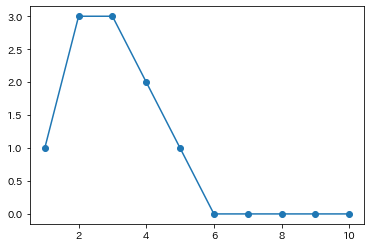

In [49]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')

In [40]:
X.shape[1]

2

In [57]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=.02):
    # setup marker generator and color map
    markers = list('sxo^v')
    colors = 'red blue lightgreen gray cyan'.split()
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y==cl, 0],
            y=X[y==cl, 1],
            alpha=.8, 
            c = colors[idx],
            marker = markers[idx],
            label = cl,
            edgecolor='black'
        )
    

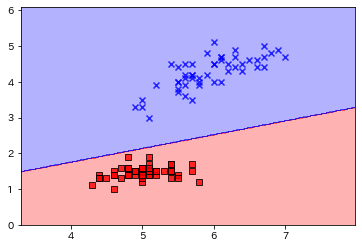

In [58]:
plot_decision_regions(X.values, y, classifier=ppn)

In [1]:
%run util.py

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

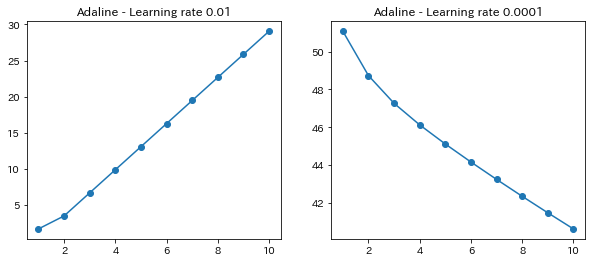

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_title("Adaline - Learning rate 0.01")

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_title('Adaline - Learning rate 0.0001')

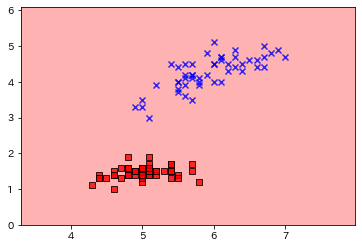

In [12]:
plot_decision_regions(X, y, classifier=ada1)

In [8]:
X_std = np.copy(X)

In [9]:
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [10]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

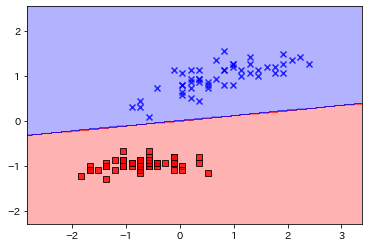

In [11]:
plot_decision_regions(X_std, y, classifier=ada)

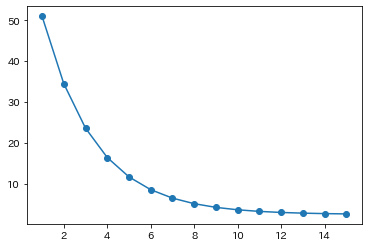

In [14]:
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')

In [15]:
ada.w_

array([ 1.39888101e-16, -1.26022147e-01,  1.10506306e+00])